In [56]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [57]:
seed_constant = 27
np.random.seed(seed_constant)
random.seed(seed_constant)

## Load data

In [4]:
DATAPATH = "../data/raw/ml-100k/"

In [5]:
#Information about the data
info = pd.read_csv(DATAPATH + "u.info", sep=" ", header=None)
info.columns=['Counts', 'Type']
info

,Counts,Type
0,943,users
1,1682,items
2,100000,ratings


In [6]:
#Types of genres
genre = pd.read_csv(DATAPATH + 'u.genre', sep="|", encoding='latin-1', header=None)
genre.drop(genre.columns[1], axis=1, inplace=True)
genre.columns = ['Genres']
genre_list = list(genre['Genres'])
genre_list

['unknown',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [59]:
#Load the Ratings data
data = pd.read_csv(DATAPATH + 'u.data', sep="\t", header=None)
data.columns = ['user_id', 'movie_id', 'rating', 'timestamp']
data.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [60]:
columns = ['movie_id', 'movie_title' ,'release_date','video_release_date', 'IMDb_URL']
columns.extend(genre_list)

item = pd.read_csv(DATAPATH + 'u.item', sep="|", encoding='latin-1', header=None)
item.columns = columns
item.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
#Load the User data
user = pd.read_csv(DATAPATH + 'u.user', sep="|", encoding='latin-1', header=None)
user.columns = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
user.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


## Data exploration

In [78]:
dist = data.copy()
# timestamp is not needed for this purposes
dist = dist.drop(['timestamp'], axis=1)
dist.head()

,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


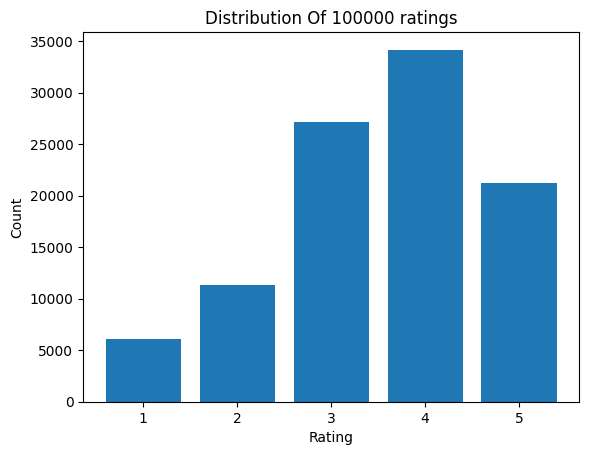

In [79]:
# Ratings Distribution

out = dist['rating'].value_counts().sort_index(ascending=False)
plt.bar(x = out.index, height = out.values)
# Create layout
plt.title('Distribution Of {} ratings'.format(dist.shape[0]))
plt.xlabel('Rating')
plt.ylabel('Count')
# Create plot
plt.show()

According to the bar plot above, in most of the cases the rating is either neutral or slightly positive. The data is properly distributed and the big chunk of ratings is between 3 and 5 which means people are not very hard towards rating.

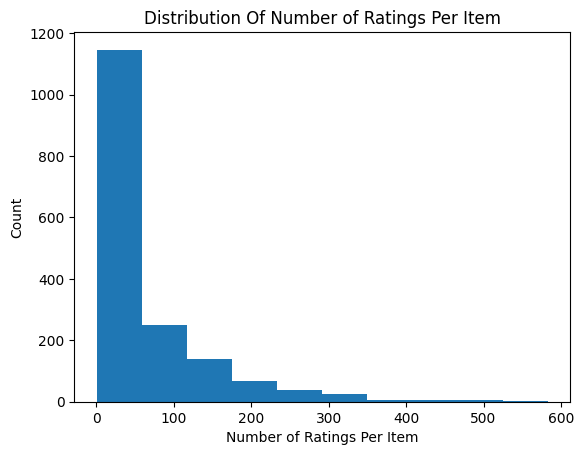

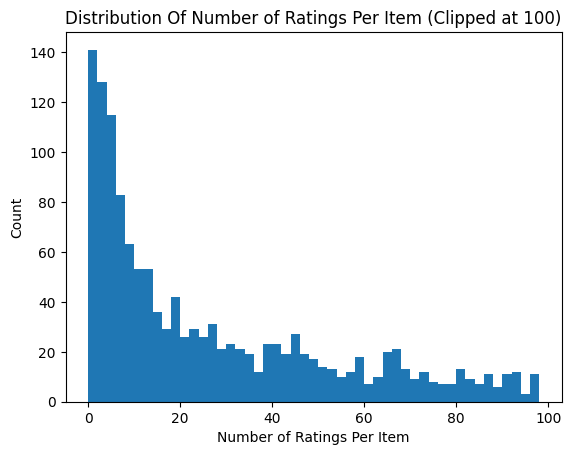

In [80]:
# Ratings Distribution By Item

out = dist.groupby('movie_id')['rating'].count()
# Create trace
plt.hist(x = out.values)
# Create layout
plt.title('Distribution Of Number of Ratings Per Item')
plt.xlabel('Number of Ratings Per Item')
plt.ylabel('Count')
# Create plot
plt.show()

plt.hist(x = out.values, bins=np.arange(0, 100, 2))
# Create layout
plt.title('Distribution Of Number of Ratings Per Item (Clipped at 100)')
plt.xlabel('Number of Ratings Per Item')
plt.ylabel('Count')
# Create plot
plt.show()

From the histogram above, we can see that big amount of items were not rated, or have less than 20 ratings.

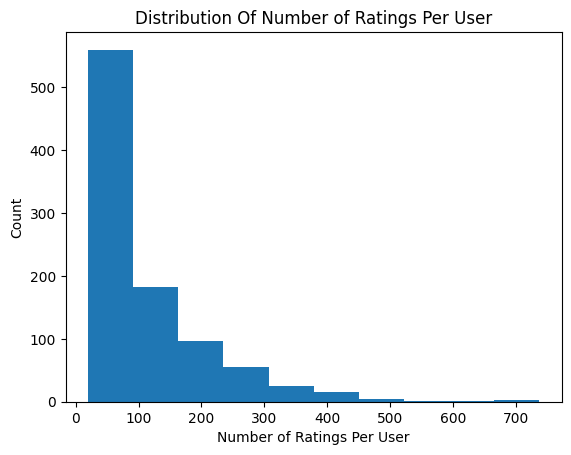

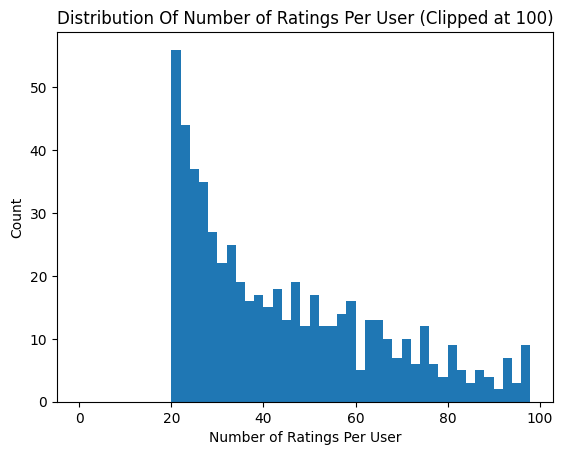

In [81]:
# Ratings Distribution By User
out = dist.groupby('user_id')['rating'].count()
# Create trace
plt.hist(x = out.values)
# Create layout
plt.title('Distribution Of Number of Ratings Per User')
plt.xlabel('Number of Ratings Per User')
plt.ylabel('Count')
# Create plot
plt.show()

plt.hist(x = out.values, bins=np.arange(0, 100, 2))
# Create layout
plt.title('Distribution Of Number of Ratings Per User (Clipped at 100)')
plt.xlabel('Number of Ratings Per User')
plt.ylabel('Count')
# Create plot
plt.show()

From the histogram above, we can see that big amount of users have less than 60 ratings. The minimumn number of ratings given by a user is 20.

## Data preprocessing

Let's merge data and item datasets to obtain the whole information table

In [189]:
merged_dataset = pd.merge(data, item, how='inner', on='movie_id')
merged_dataset.head()

,user_id,movie_id,rating,timestamp,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,875747190,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,883888671,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,879138235,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,876503793,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,0,0,0


We can see that for 18 films, there is a problem of title dublication

In [190]:
(item[['movie_title', 'movie_id']].groupby('movie_title').count() > 1).value_counts()

movie_id
False       1646
True          18
Name: count, dtype: int64

It can cause some inconsistency like:

In [135]:
merged_dataset[(merged_dataset['movie_title'] == 'Chasing Amy (1997)') & (merged_dataset['user_id'] == 894)]

,user_id,movie_id,rating,timestamp,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
4800,894,246,4,882404137,Chasing Amy (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Chasing+Amy+(...,0,0,...,0,0,0,0,0,1,0,0,0,0
22340,894,268,3,879896041,Chasing Amy (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Chasing+Amy+(...,0,0,...,0,0,0,0,0,1,0,0,0,0


Therefore we need to refine the dataset

In [180]:
refined_dataset = merged_dataset.groupby(by=['user_id','movie_title'], as_index=False).agg({"rating":"mean"})
refined_dataset.head()

,user_id,movie_title,rating
0,1,101 Dalmatians (1996),2.0
1,1,12 Angry Men (1957),5.0
2,1,"20,000 Leagues Under the Sea (1954)",3.0
3,1,2001: A Space Odyssey (1968),4.0
4,1,"Abyss, The (1989)",3.0


### Train and test split

In [186]:
from sklearn.model_selection import train_test_split

# Perform a 80/20 train-test split on the interactions in the dataset
train, test = train_test_split(refined_dataset, test_size=0.2, random_state=seed_constant)

In [187]:
print("Train Size  : ", len(train))
print("Test Size : ", len (test))

Train Size  :  79754
Test Size :  19939


In [188]:
train.to_csv('../data/interim/train.csv', index=False)
test.to_csv('../data/interim/test.csv', index=False)